# Taller 3
Estudiantes: Andrea Coral, Diego Ávila y Valentina Gonzalez

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as sco
import warnings
warnings.filterwarnings("ignore")
%pip install --quiet yfinance
import yfinance as yf
from pandas_datareader import data as pdr
import cvxpy as cp
from scipy.stats import norm

# Punto 1

In [ ]:
precios1 = yf.download("IBM", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos1 = np.log(precios1/precios1.shift()).dropna()
precios2 = yf.download("CSCO", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos2 = np.log(precios2/precios2.shift()).dropna()
precios3 = yf.download("INTC", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos3 = np.log(precios3/precios3.shift()).dropna()
precios4 = yf.download("JNJ", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos4 = np.log(precios4/precios4.shift()).dropna()
precios5 = yf.download("CVX", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos5 = np.log(precios5/precios5.shift()).dropna()
p_indice = yf.download("^DJI", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
r_indice = np.log(p_indice/p_indice.shift()).dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# CON EL ACTIVO IBM (International Business Machines Corporation)
import statsmodels.api as sm
X = r_indice
Y = retornos1
X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()#calculos del model anterior, el fit estima los retornos del activo
print(model1.summary())
#tabla anova completa

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           9.44e-09
Time:                        21:25:58   Log-Likelihood:                 85.493
No. Observations:                  60   AIC:                            -167.0
Df Residuals:                      58   BIC:                            -162.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.008     -0.180      0.8

In [ ]:
par1= model1.params
par1

const       -0.001383
Adj Close    0.962770
dtype: float64

In [ ]:
# CON EL ACTIVO CSCO (CISCO SYSTEM)
import statsmodels.api as sm
X = r_indice
Y = retornos2
X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()#calculos del model anterior, el fit estima los retornos del activo
print(model2.summary())
#tabla anova completa

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     48.11
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           3.75e-09
Time:                        21:26:06   Log-Likelihood:                 86.364
No. Observations:                  60   AIC:                            -168.7
Df Residuals:                      58   BIC:                            -164.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.008      0.179      0.8

In [ ]:
par2= model2.params
par2

const        0.001355
Adj Close    0.982787
dtype: float64

In [ ]:
# CON EL ACTIVO INTC (INTEL CORP)
import statsmodels.api as sm
X = r_indice
Y = retornos3
X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()#calculos del model anterior, el fit estima los retornos del activo
print(model3.summary())
#tabla anova completa

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     23.73
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           8.95e-06
Time:                        21:26:18   Log-Likelihood:                 75.039
No. Observations:                  60   AIC:                            -146.1
Df Residuals:                      58   BIC:                            -141.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0111      0.009     -1.211      0.2

In [ ]:
par3= model3.params
par3

const       -0.011060
Adj Close    0.833532
dtype: float64

In [ ]:
# CON EL ACTIVO JNJ (JOHNSON AND JOHNSON)
import statsmodels.api as sm
X = r_indice
Y = retornos4
X = sm.add_constant(X)
model4 = sm.OLS(Y, X).fit()#calculos del model anterior, el fit estima los retornos del activo
print(model4.summary())
#tabla anova completa

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     37.02
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           9.89e-08
Time:                        21:26:25   Log-Likelihood:                 108.52
No. Observations:                  60   AIC:                            -213.0
Df Residuals:                      58   BIC:                            -208.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.005      0.612      0.5

In [ ]:
par4= model4.params
par4

const        0.003199
Adj Close    0.595905
dtype: float64

In [ ]:
# CON EL ACTIVO CVX (CHEVRON CORP)
import statsmodels.api as sm
X = r_indice
Y = retornos5
X = sm.add_constant(X)
model5 = sm.OLS(Y, X).fit()#calculos del model anterior, el fit estima los retornos del activo
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     60.08
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.60e-10
Time:                        21:26:30   Log-Likelihood:                 79.443
No. Observations:                  60   AIC:                            -154.9
Df Residuals:                      58   BIC:                            -150.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.008      0.428      0.6

In [ ]:
par5= model5.params
par5

const        0.003633
Adj Close    1.232513
dtype: float64

In [ ]:
mediaind= r_indice.mean()
mediaind

0.004889644163221778

In [ ]:
#retronos estimados
ret_ibm =par1[1]*mediaind
ret_csco =par2[1]*mediaind
ret_intc =par3[1]*mediaind
ret_jnj =par4[1]*mediaind
ret_cvx =par5[1]*mediaind

In [ ]:
#betas 
beta_ibm= par1[1]
beta_csco= par2[1]
beta_intc= par3[1]
beta_jnj= par4[1]
beta_cvx= par5[1]

In [ ]:
# r_squeared
r_sq_ibm= model1.rsquared
r_sq_csco= model2.rsquared
r_sq_intc= model3.rsquared
r_sq_jnj= model4.rsquared
r_sq_cvx= model5.rsquared

In [ ]:
#retornos esperados
retp_ibm =retornos1.mean()
retp_csco =retornos2.mean()
retp_intc =retornos3.mean()
retp_jnj =retornos4.mean()
retp_cvx =retornos5.mean()

In [ ]:
#Volatilidades
vol_ibm= retornos1.std()
vol_csco= retornos2.std()
vol_intc= retornos3.std()
vol_jnj= retornos4.std()
vol_cvx= retornos5.std()

A. Tabla resumen

In [ ]:

tabla_resumen= {"retorno estimado": [ret_ibm, ret_csco, ret_intc, ret_jnj, ret_cvx],
                "Beta": [beta_ibm, beta_csco, beta_intc, beta_jnj, beta_cvx],
                "retorno esperado": [retp_ibm, retp_csco, retp_intc, retp_jnj, retp_cvx],
                "r_squared": [r_sq_ibm, r_sq_csco, r_sq_intc, r_sq_jnj, r_sq_cvx],
                "Volatilidades": [vol_ibm, vol_csco, vol_intc, vol_jnj, vol_cvx]}
tabla= pd.DataFrame(tabla_resumen, index= ["MMM", "CSCO", "INTC", "JNJ", "CVX"])
tabla

,retorno estimado,Beta,retorno esperado,r_squared,Volatilidades
MMM,0.004708,0.962770,0.003324,0.436073,0.078160
CSCO,0.004805,0.982787,0.006160,0.453407,0.078245
INTC,0.004076,0.833532,-0.006984,0.290315,0.082933
JNJ,0.002914,0.595905,0.006112,0.389593,0.051181
CVX,0.006027,1.232513,0.009659,0.508802,0.092632


B. Gráfica

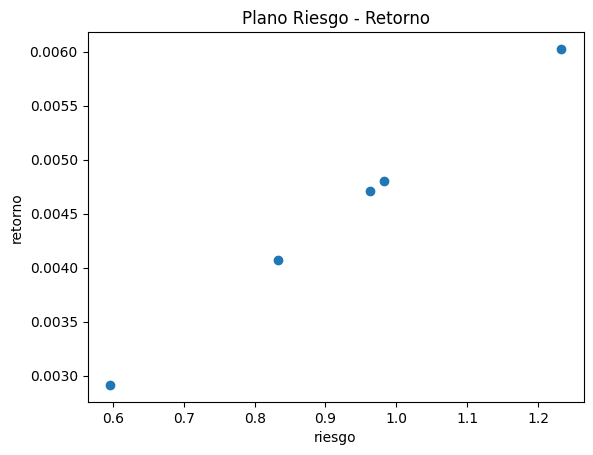

In [ ]:
ret_estimado=pd.DataFrame([ret_ibm, ret_csco, ret_intc, ret_jnj, ret_cvx])
sigma= pd.DataFrame([beta_ibm, beta_csco, beta_intc, beta_jnj, beta_cvx])
fi, ax= plt.subplots();
ax.scatter(sigma, ret_estimado)
ax.set_xlabel("riesgo")
ax.set_ylabel("retorno")
ax.set_title("Plano Riesgo - Retorno")
plt.show()

Análisis: El activo con mayor sensibilidad a los movimientos el mercado es CVX puesto que tiene un Beta de 1.23, lo que nos indica que tiene una relación directa y mayor con el mercado por lo cual renta más que este por lo que si el precio de la acción está alta se espera que a futuro bajen para volverse a regular, asimismo, es la acción que presneta mayor rentabilidad estimada (bajo el modelo CAPM) pues es de 0.006, está acción tiene un retorno 0.00122 más alto que la acción de CSCO que es el activo que le sigue, tanto en retorno como en Beta (es de 0.98). Con base en la situación presentada se puede observar la relación entre riesgo - retorno que nos indica que a mayor rentabilidad mayor riesgo, pues el comportamiento de las acciones es acorde a esto (lo cual puede ser observado en la gráfica).

# Punto 2

A. Gráfica

In [ ]:
activos=["BRK-B","CSCO","AMZN","KO","XOM"] 
precios = yf.download(activos, start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos = np.log(precios/precios.shift()).dropna()
p_indice = yf.download("^DJI", start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
r_indice = np.log(p_indice/p_indice.shift()).dropna()

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#Retornos esperados
mu=retornos.mean()
#Matrix de covarianzas
cov=retornos.cov()
#Varianzas
var=np.diag(cov)
#Desviación
des=np.sqrt(var)
# # de datos
n=len(mu)

In [ ]:
n = len(mu)
x = cp.Variable(n)
objetivo = cp.Minimize(cp.quad_form(x, cov))
restricciones = [x @ mu == 1, x >= 0]
prob = cp.Problem(objetivo, restricciones)
prob.solve()
wpt = x.value/x.value.sum()

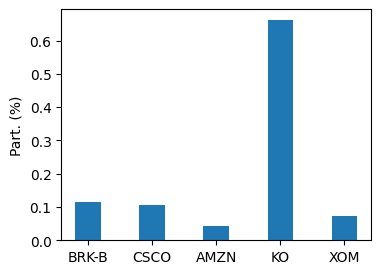

In [ ]:
plt.figure(figsize = (4, 3))
plt.bar(activos, x.value/x.value.sum(), width = 0.4)
plt.ylabel("Part. (%)")
plt.show();

In [ ]:
# Retornos históricos del portafolio tangente:
ret_port = retornos @ wpt
rpt = ret_port.mean()
sigmapt = ret_port.std()
rpt, sigmapt

(0.007766835978753977, 0.050521130801529056)

In [ ]:
df = pd.DataFrame({' ' : ["AMZN","BRK-B","CSCO","KO","XOM"],
        'Retorno esperado' : [mu[0],mu[1],mu[2],mu[3],mu[4]],
        'Volatilidad' : [des[0],des[1],des[2],des[3],des[4]],
        'weights (%)' : [wpt[0], wpt[1], wpt[2],wpt[3],wpt[4]]})
df

,,Retorno esperado,Volatilidad,weights (%)
0,AMZN,0.006037,0.097632,0.115277
1,BRK-B,0.007394,0.060573,0.106788
2,CSCO,0.006160,0.078245,0.043056
3,KO,0.008096,0.057042,0.660928
4,XOM,0.008991,0.099396,0.073951


B. VaR del portafolio

In [ ]:
w = cp.Variable(n)
riesgo = cp.quad_form(w,cov)
objective = cp.Minimize(riesgo)
constraints = [cp.sum(w)==1, w>=0]
optimizar = cp.Problem(objective,constraints)
optimizar.solve()
wpmvg = w.value
r_ptf = retornos @ wpmvg 

In [ ]:
#Retorno del portafolio y volatilidad
Ret_port=r_ptf.mean()
vol_port=r_ptf.std()
print(Ret_port,vol_port) 

0.007444759461486473 0.04945799226226621


In [ ]:
#Delta VAR 1
alpha=0.01 
Var_por=Ret_port- norm.ppf(1-alpha)*vol_port
Var_por

-0.10761173569216488

In [ ]:
#Delta VAR 2
alpha=0.05 #95% de confianza y 5% de significancia
Var_por_2=Ret_port- norm.ppf(1-alpha)*vol_port
Var_por_2

-0.07390639849283995

In [ ]:
VAR_E=np.percentile(Ret_port,1) #99% de confianza y 1% de significancia
VAR_E

0.007444759461486473

Respuesta: La maxima ganancia con un margen de error del 1% es de 0,74%

C.  Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo de estimación histórica

In [ ]:
w = cp.Variable(n)
riesgo = cp.quad_form(w,cov)
objetivo = cp.Minimize(riesgo)
constraints = [cp.sum(w)==1, w>=0]
optimizar = cp.Problem(objetivo,constraints)
optimizar.solve()
wpmvg = w.value
r_ptf1 = retornos @ wpmvg

In [ ]:
#Retorno del portafolio y volatilidad
Ret_port1=r_ptf1.mean()
vol_port1=r_ptf1.std()

In [ ]:
# Delta VaR
alpha = 0.01
Varp1 = Ret_port1 - norm.ppf(1-alpha)*vol_port1
Varp1

-0.10761173569216488

In [ ]:
alpha1 = 0.05
VaRp1 = Ret_port1 - norm.ppf(1-alpha1)*vol_port1
VaRp1

-0.07390639849283995

In [ ]:
Var_historico = np.percentile(r_ptf1,1) # 1 para el 99% de confianza
Var_historico

-0.10734556672311772

Respuesta: la máxima perdida con un nivel de confianza del 99% es de 10,73%

D. Utilice el método de Monte Carlo para construir una muestra aleatoria de 10.000 portafolios. Con esta muestra aleatoria calcular el VaR de simulación del portafolio.

In [ ]:
port_rand = 1000
weights = np.zeros((port_rand, n))
for i in range(port_rand):
    w = np.random.random(n) 
    w = w / np.sum(w)            
    weights[i,:] = w 

In [ ]:
rand_rpt = weights @ mu
rand_sigmapt = np.zeros(port_rand)
for i in range(port_rand):
  rand_sigmapt[i] = np.sqrt(weights[i,:].T @ cov @ weights[i,:])

In [ ]:
Ret_mc=rand_rpt.mean()
Des_mc=rand_rpt.std()

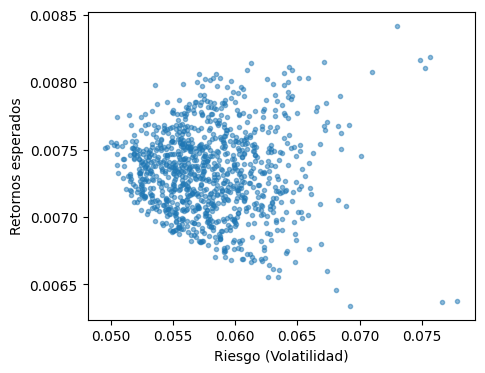

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(rand_sigmapt, rand_rpt, '.', alpha=0.5)
plt.xlabel("Riesgo (Volatilidad)")
plt.ylabel("Retornos esperados")
plt.show();

In [ ]:
# Delta VaR
alpha = 0.01
VarMC1 = Ret_mc - norm.ppf(1-alpha)*Des_mc
VarMC1

0.006601257121945106

Respuesta: La maxima ganancia con un margen de error del 1% es de 0,65%

E. ¿Se encuentran diferencias significativas entre el VaR de simulación y el VaR de paramétrico?

In [ ]:
Var_mc = np.percentile(Ret_mc,1) # 1 para el 99% de confianza
Var_mc

0.007334080887228422

In [ ]:
#Var parametrico
VAR_E=np.percentile(Ret_port,1) #99% de confianza y 1% de significancia
VAR_E

0.007444759461486473

Respuesta: No se encuentran diferencias significativas en los valores dado por el VaR de simulación y el VaR parametrico, sin embargo, la exactitud del VaR hecho por la simulación podria tener una mayor precisión si se da un mayor número de simulaciones

# Punto 3

A. Escoja una acción de su preferencia. Con la información histórica con cierre a Dic-2022,
estime los parámetros μ y σ. Utilice el método de Monte Carlo para generar una muestra
aleatoria de 10.000 posibles valores del precio del activo en el instante t = 1. Presente
gráficamente las primeras 20 trayectorias del proceso.

In [74]:
activos = ("AAPL")
precios = yf.download(activos, start="2017-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos = np.log(precios/precios.shift()).dropna()
precios



[*********************100%***********************]  1 of 1 completed


Date
2017-12-01     40.168854
2018-01-01     39.741608
2018-02-01     42.279011
2018-03-01     39.987049
2018-04-01     39.386463
                 ...    
2022-08-01    156.502960
2022-09-01    137.760773
2022-10-01    152.852661
2022-11-01    147.559555
2022-12-01    129.731918
Name: Adj Close, Length: 61, dtype: float64

In [75]:
mu = retornos.mean()
sigma = retornos.std()

In [76]:
S0p3 = precios[-1]
S0p3

129.73191833496094

In [77]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [127]:
T = 1 # Un Año
mu = retornos.mean()*12
sigma  = retornos.std()*np.sqrt(12)
S0  = S0p3
NS = 10000
M = 12 # Partición del año en días
St = PathsGBM(S0,mu,sigma,T,NS,M)

Text(0.5, 0, 'Tiempo')

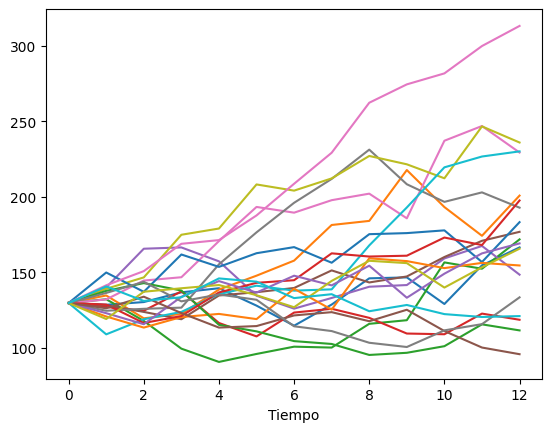

In [79]:
plt.plot(np.transpose(St[0:20])) 
plt.xlabel("Tiempo")

B. Histograma

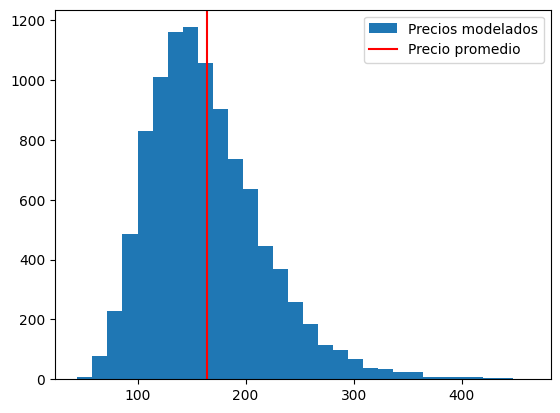

In [80]:
plt.hist(St[:,-1], bins=30, label='Precios modelados')
plt.axvline(St[:,-1].mean(), color='r', label='Precio promedio')
plt.legend();

Respuesta: En el histograma se puede observar un sesgo positivo o a la derecha de los precios modelados, es decir, no tienen una distribución simétrica ya que su promedio oscila entre 100 y 150 donde estan concentrados la mayoría de valores, mientras que los últimos valores están por 300 y son muy pocos.

C. Demuestre que el valor del precio simulado de la acción en T converge a ST exp{μ T}.

In [129]:
S0 * np.exp(mu * T)

164.01301802638292

In [131]:
St[:,-1].mean()

164.43516145845473

D. Calcule la probabilidad de que el precio de la acción sea inferior a S0

In [83]:
d= St[:,-1]
len(d[d<S0])/NS

0.2791

La probabilidad de que el precio de la acción sea inferior a S0 es 0.27, es decir, 27.91%

# Punto 4

A. Utilice el método de Monte Carlo para realizar una simulación de 100 posibles trayectorias de este proceso considerando los siguientes valores: X0 = 1, μ = 3, σ =0. 3, T = 5, ns = 100, dt = T/m.

In [ ]:
#Datos
X0 = 1   
mu = 3   
sigma = 0.3   
T = 5   
ns = 100  
m = 100   
dt = T / m

In [ ]:
#Parametrizamos la función
def OrnsteinUhlenbeck(X0, mu, sigma, T, dt):
    N = round(T/dt) # # de simulaciones
    t = np.linspace(0, T, N+1) #Discreto
    X = np.zeros(N+1) #V de ceros
    X[0] = X0 #Toma inicio desde el valor que se le da
    for i in range(N):
        dW = np.random.normal(0, np.sqrt(dt)) #Media 0 y varianza Dt
        X[i+1] = X[i] + (mu-X[i])*dt + sigma*dW #Proceso Ornstein
    return  t, X

In [ ]:
trayectorias = []
for i in range(ns):
    _, X = OrnsteinUhlenbeck(X0, mu, sigma, T, dt)
    trayectorias.append(X)

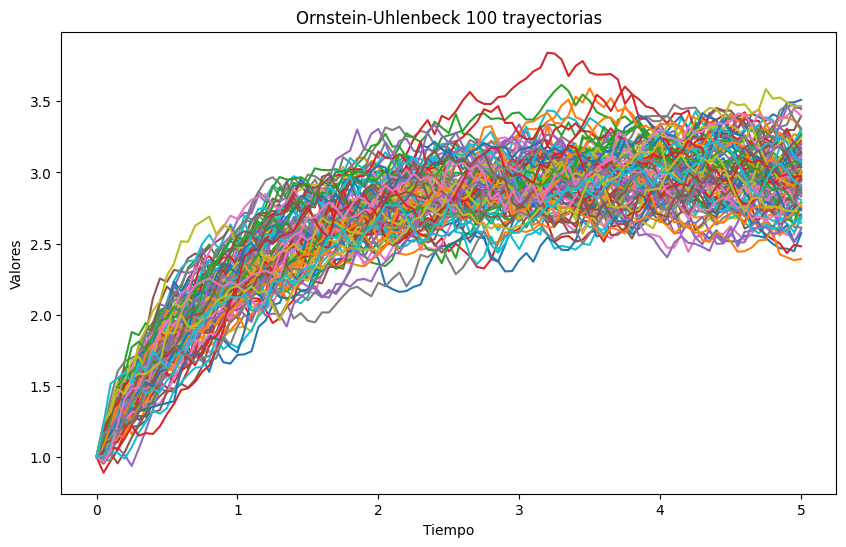

In [ ]:
plt.figure(figsize=(10,6))
for i in range(ns):
    plt.plot(np.linspace(0, T, m+1), trayectorias[i])
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Ornstein-Uhlenbeck 100 trayectorias')
plt.show()

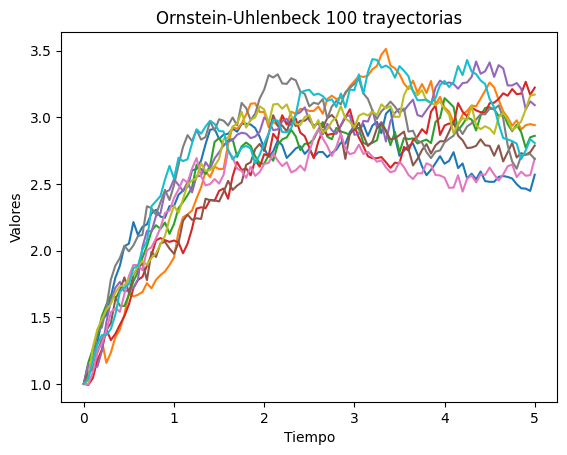

In [ ]:
for i in range(10): #i es el numero de trayectorias que le proponemos al modelo que haga
    plt.plot(np.linspace(0, T, m+1), trayectorias[i])
plt.xlabel('Tiempo')
plt.ylabel('Valores')
plt.title('Ornstein-Uhlenbeck 100 trayectorias')
plt.show()

B. A partir de los observado en las simulaciones realizadas en el punto anterior, ¿qué puede concluir acerca del valor esperado y la varianza del proceso Ornstein-Uhlenbeck en el largo plazo?


Respuesta: Por el lado de su valor esperado el cual es 3, se puede deducir que a un mayor tiempo los valores que toma la prueba aleatoria va a oscilar entre la media propuesta. En cuanto a la varianza, se evidencia que al principio no se evidencia tanta disparidad como en la ventan de tiempo entre 1 y 2, no obstante, al final del periodo pareciera que los valores vuelven a tener la tendencia de ajustarse sobre la media, por lo que al final de la muestra debe ser poca

C. De acuerdo con la ecuación 1, ¿cuál es la distribución de probabilidad del proceso Ornstein-Uhlenbeck?

In [ ]:
dW = np.random.normal(0, np.sqrt(dt))
dW

0.16768584249702065

Respuesta: Para el proceso Ornstein-Uhlenbeck, mediante la formula dw permite entender que es una variable aleatoria, por tanto el np.random, con una distribución normal, np.random.normal, en la cual definimos como su media=0, y la varianza como los valores que toma la raiz de dt, el cual toma en cuenta el tamaño del paso del tiempo que ponemos como T.

D. Presente gráficamente los resultados para las primeras 10 trayectorias del proceso.

In [ ]:
#Datos
r0=0.03 #Tasa
mu=0.05
sigma=0.15
T=1
ns=100
dt=T/m

In [ ]:
def tasa_corta(r0, mu, sigma, T, ns, dt):
    t = np.arange(0, T + dt, dt)
    r = np.zeros((ns, len(t)))
    r[0] = r0
    for i in range(1, len(t)):
        dW = np.random.normal(0, np.sqrt(dt), size=ns)
        r[:, i] = r[:, i - 1] + (mu - r[:, i - 1]) * dt + sigma * dW
    rT = r[:, -1].mean()

    return rT


In [ ]:
rT =tasa_corta(r0, mu, sigma, T, ns, dt)
print("La tasa corta es",rT*100)

La tasa corta es 3.458097991006125


In [ ]:
#Bono cero cupóny facial 100 con vencimiento en T
Bono= 100/(1+rT)**T
Bono

96.65748930421402

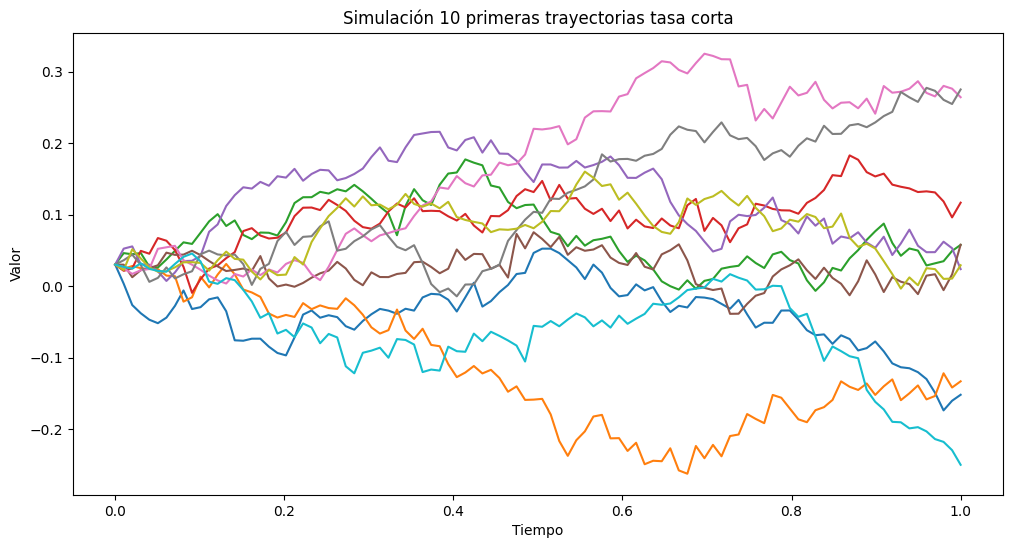

In [ ]:
plt.figure(figsize=(12,6))
for i in range(10):
    r = np.zeros((ns, 1))
    r[0] = r0
    
    for j in range(1, ns):
        dW = np.random.normal(0, np.sqrt(dt))
        r[j] = r[j-1] + (mu - r[j-1]) * dt + sigma * dW
    
    plt.plot(np.linspace(0, T, ns), r)

plt.title('Simulación 10 primeras trayectorias tasa corta')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

# Punto 5

In [30]:
precios5 = yf.download("^IRX", start="2004-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos5 = np.log(precios5/precios5.shift()).dropna()
precios6 = yf.download("GC=F", start="2004-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos6 = np.log(precios6/precios6.shift()).dropna()
precios7 = yf.download("BZ=F", start="2004-12-01", end="2022-12-31", interval="1Mo")["Adj Close"] #ventana de tiempo 5 años con periodicidad mensual, si no es dia habil genera error
retornos7 = np.log(precios7/precios7.shift()).dropna()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [56]:
p5 = precios5[-1]
p5

4.260000228881836

In [57]:
p6 = precios6[-1]
p6

1819.699951171875

In [58]:
p7 = precios7[-1]
p7

85.91000366210938

A. 

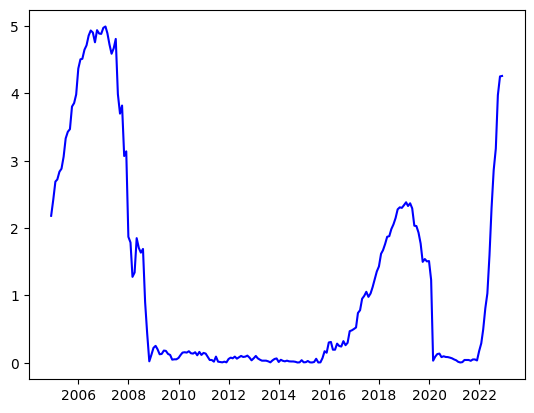

In [39]:
plt.plot(precios5, color="blue")


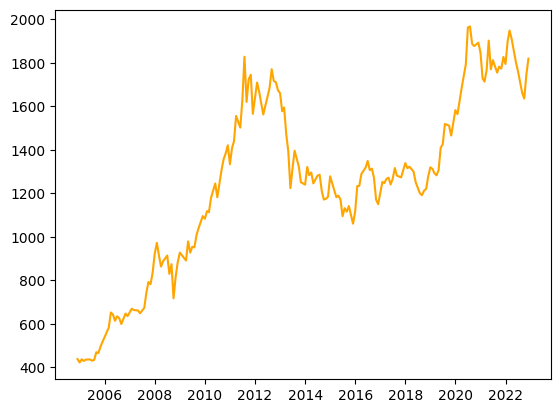

In [71]:
plt.plot(precios6, color="orange")

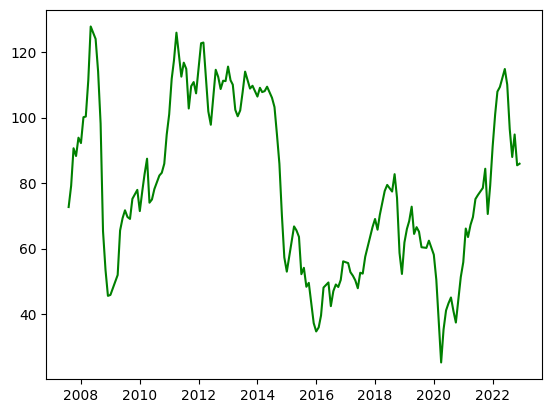

In [72]:
plt.plot(precios7, color="green")

B. Prueba de estacionareidad

In [42]:
import statsmodels.api as sm
#from statsmodels.tsa.api import acf, pacf, graphics
#from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

Para el primer activo:

In [43]:
pruebadf1 = adfuller(precios5)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.982004
P-value: 0.294519
Citical values:
	1%: -3.461727
	5%: -2.875337
	10%: -2.574124


Si se toma como nivel de significancia el 5%, el valor-p (0,29)es mayor que el 5%, por lo tanto es no estacionaria

Para el segundo activo:

In [44]:
pruebadf1 = adfuller(precios6)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -1.539200
P-value: 0.514039
Citical values:
	1%: -3.466201
	5%: -2.877293
	10%: -2.575168


Si se toma como nivel de significancia el 5%, el valor-p (0,51)es mayor que el 5%, por lo tanto es no estacionaria

Para el tercer activo:

In [73]:
pruebadf1 = adfuller(precios7)  # Options: regression='c', 'ct', 'n', autolag='AIC'
print("ADF test: %f" % pruebadf1[0])
print("P-value: %f" % pruebadf1[1])
print("Citical values:")
for key, value in pruebadf1[4].items():
  print("\t%s: %f" %(key,value))

ADF test: -2.497247
P-value: 0.116146
Citical values:
	1%: -3.472703
	5%: -2.880132
	10%: -2.576683


Si se toma como nivel de significancia el 5%, el valor-p (0,11)es mayor que el 5%, por lo tanto es no estacionaria

C. 

Para el primer activo

In [132]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M # T = Unidades año, M = Número de trayectorias
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    return S

In [133]:
mu5 = retornos5.mean()*12
sigma5 = retornos5.std()*np.sqrt(12)

In [134]:
T = 1 
mu = mu5
sigma = sigma5
S0 = p5
NS = 100 
M = 12
St = PathsGBM(S0,mu,sigma,T,NS,M)

In [135]:
St[:,-1].mean()

4.397619050407714

In [136]:
S0 * np.exp(mu5 * T)

4.421316050758347

Para el segundo activo

In [137]:
mu6 = retornos6.mean()*12
sigma6 = retornos6.std()*np.sqrt(12)

In [138]:
T = 1 
mu = mu6
sigma = sigma6
S0 = p6
NS = 100 
M = 1
St = PathsGBM(S0,mu,sigma,T,NS,M)

In [139]:
St[:,-1].mean()

1995.191178607507

In [140]:
S0 * np.exp(mu * T)

1995.9632652310097

Para el tercer activo

In [141]:
T = 1 
mu = retornos7.mean()*12
sigma = retornos7.std()*np.sqrt(12)
S0 = p7
NS = 100 
M = 1
St = PathsGBM(S0,mu,sigma,T,NS,M)

In [142]:
St[:,-1].mean()

87.36151136445044

In [143]:
S0 * np.exp(mu * T)

87.00722374728642